In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

C:\Users\yasha\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
# replacing the white spaces with _

df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR_', 'CGPA', 'Research', 'Chance_of_Admit_'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial_No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE_Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR_,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit_,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [7]:
# checking for null values

df.isnull().sum()

Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

In [8]:
df['Chance_of_Admit_']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit_, Length: 500, dtype: float64

In [9]:
# checking unique values in target feature

df['Chance_of_Admit_'].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [10]:
df['Chance_of_Admit_'].value_counts()

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance_of_Admit_, Length: 61, dtype: int64

In [11]:
df.drop('Serial_No.', axis=1, inplace=True)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data visualiztion

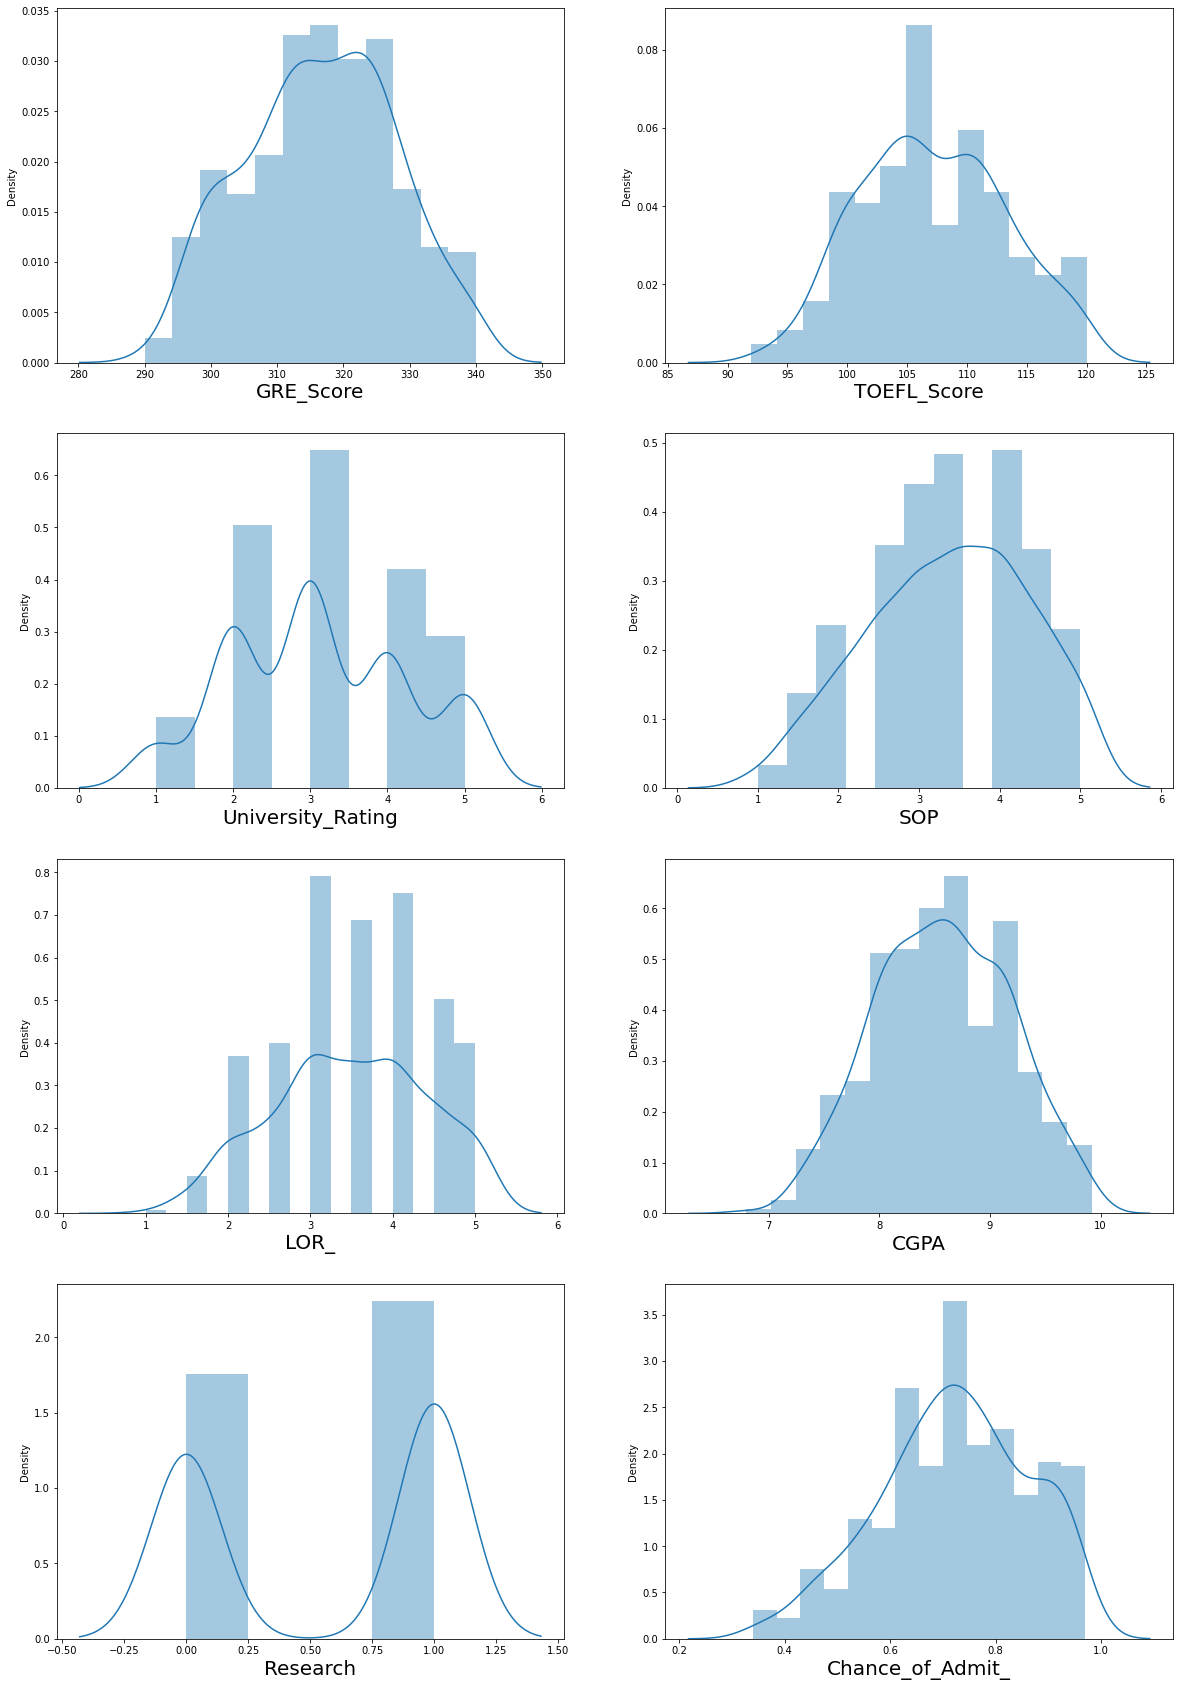

In [12]:
# lets see how data is distributed in each coloumn

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for coloumn in df :
    if plotnumber<=8 :
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df[coloumn])
        plt.xlabel(coloumn,fontsize=20)
            
    plotnumber+=1
plt.show()    

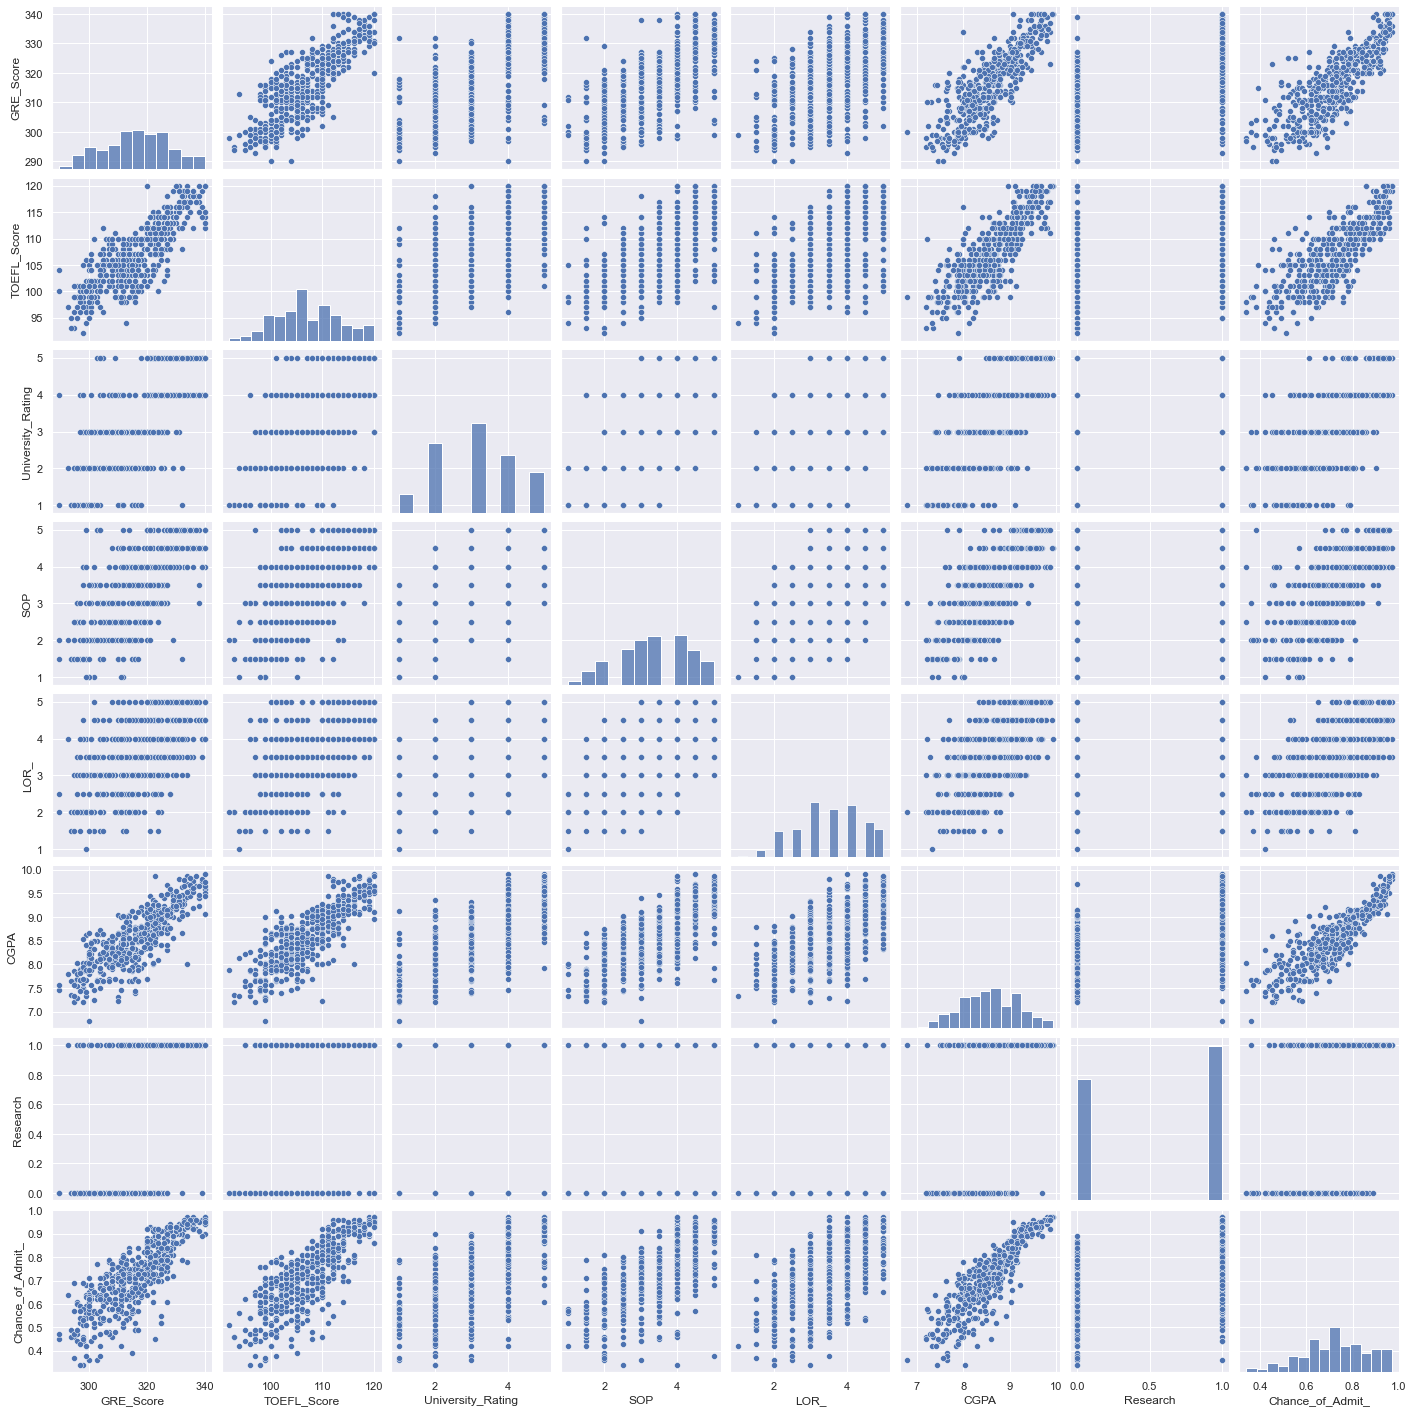

In [25]:
sns.pairplot(df)

<AxesSubplot:>

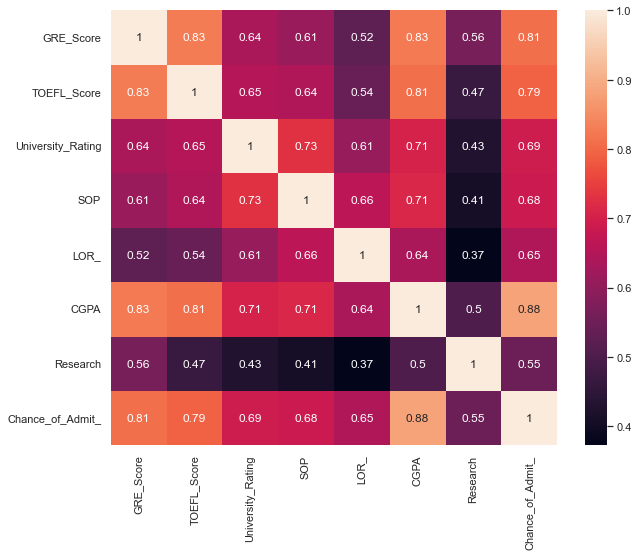

In [13]:
# see the graph in heatmap

sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(df.corr(),annot=True)

we can clearly see that chnace and cgpa has highly correlated

## ## dividing the dataset as independent and dependent variable

In [14]:
x = df.drop(columns='Chance_of_Admit_')

In [15]:
x

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [17]:
y = df['Chance_of_Admit_']

In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit_, Length: 500, dtype: float64

In [19]:
# divideing the dataset as test and train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [20]:
x_train.shape

(335, 7)

In [21]:
x_test.shape

(165, 7)

In [22]:
y_train.shape

(335,)

In [23]:
y_test.shape

(165,)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_tf = scaler.fit_transform(x_train)
x_test_tf = scaler.transform(x_test)

In [27]:
from sklearn.svm import SVR

# for kernal polynomial, rbf

model1 = SVR(kernel='poly')
model2 = SVR(kernel='rbf')

## for polynomial

In [28]:
model1.fit(x_train_tf,y_train)

SVR(kernel='poly')

In [29]:
y_pred1 = model1.predict(x_test_tf)

In [31]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicited': y_pred1})
df1.head()

,Actual,Predicited
151,0.94,0.854448
424,0.91,0.833855
154,0.80,0.742309
190,0.90,0.796918
131,0.77,0.821835


In [32]:
# performace matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.004914444254557202
0.056053477351871335
0.0701030973249913


In [33]:
# r squared

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred1)
print(score)

0.7144096954581589


In [34]:
adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

adjusted_R_square

0.7016763697779494

from polynomial kernal we can expect 71% r2 and 70% adjusted r2 accuracy

## for rbf

In [35]:
model2.fit(x_train_tf,y_train)

SVR()

In [36]:
y_pred2 = model2.predict(x_test_tf)

In [37]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicited': y_pred2})
df2.head()

,Actual,Predicited
151,0.94,0.863782
424,0.91,0.864055
154,0.80,0.646558
190,0.90,0.856761
131,0.77,0.707424


In [38]:
# performace matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))
print(np.sqrt(mean_squared_error(y_test,y_pred2)))

0.004383531590833559
0.05235966587445851
0.06620824413042199


In [39]:
# r squared

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred2)
print(score)

0.7452623212006025


In [40]:
adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

adjusted_R_square

0.7339045902987186

from rbf we can see 74% r2 and 73% adjusted r2 accuaray